In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("AccidentesAviones.csv", na_values=["?", "-"])

Time - Local time, in 24 hr. in the format hh:mm
Location - Location of the accident
Operator - Airline or operator of the aircraft
Flight - Flight number assigned by the aircraft operator
Route - Complete or partial route flown prior to the accident
Type - Aircraft type
Registration - ICAO registration of the aircraft
cn/In - Construction or serial number / Line or fuselage number
Total Aboard - Total people aboard
Passengers Aboard - Passengers aboard
Crew Aboard - Crew aboard
Total Fatalities - Total fatalities
Passengers Fatalities - Passengers fatalities
Crew Fatalities - Crew fatalities
Ground - Total killed on the ground
Summary - Brief description of the accident and cause if known

In [73]:
df = df.drop("Unnamed: 0", axis = 1)

In [74]:
df.rename(columns = {"fecha" : "Date", "HORA declarada" : "Time", "ac_type" : "Type", "registration" : "Registration", "cn_ln" : "Cn/In", "all_aboard" : "Total_aboard", "PASAJEROS A BORDO" : "Passanger_aboard", "crew_aboard" : "Crew_aboard", "cantidad de fallecidos" : "Total_fatalities", "passenger_fatalities" : "Passenger_fatalities", "crew_fatalities" : "Crew_fatalities", "ground" : "Ground", "summary" : "Summary", "OperadOR" : "Operator", "flight_no" : "Flight_no", "route" : "Fly_Route", "Ruta" : "Accident_Place"}, inplace = True)

In [75]:
df["Date"] = pd.to_datetime(df["Date"])

In [78]:
df = df.dropna(subset =["Total_aboard", "Total_fatalities"])

In [79]:
df["Time"].fillna("00:00", inplace = True)
df["Accident_Place"].fillna("no_accident_place", inplace = True)
df["Operator"].fillna("no_operator", inplace = True)
df["Flight_no"].fillna("no_flight_no", inplace = True)
df["Fly_Route"].fillna("no_fly_route", inplace = True)
df["Type"].fillna("no_type", inplace = True)
df["Registration"].fillna("no_registration", inplace = True)
df["Cn/In"].fillna("no_cn/in", inplace = True)
df["Summary"].fillna("no_summary", inplace = True)


In [80]:
df["Year"] = df["Date"].dt.strftime("%Y")

C:\Users\Yanina Lucia\AppData\Local\Temp\ipykernel_12508\4054731694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total_aboard"], hist=True) #Density es la proporsion de vuelos que tenian esa cantidad de personas abordo.


count    4991.000000
mean       31.121218
std        45.479965
min         0.000000
25%         7.000000
50%        16.000000
75%        35.000000
max       644.000000
Name: Total_aboard, dtype: float64

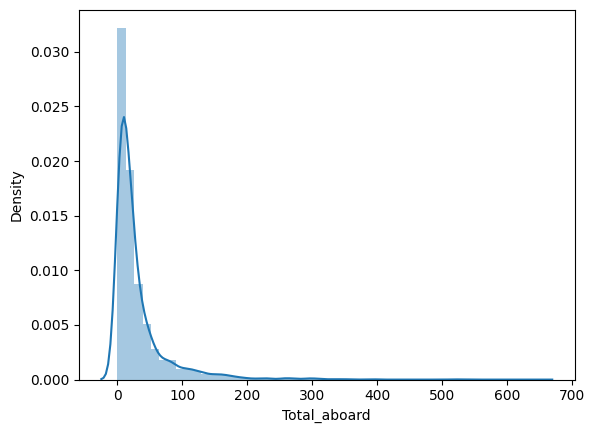

In [81]:
sns.distplot(df["Total_aboard"], hist=True) #Density es la proporsion de vuelos que tenian esa cantidad de personas abordo.
df["Total_aboard"].describe()

C:\Users\Yanina Lucia\AppData\Local\Temp\ipykernel_12508\1391768579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total_fatalities"], hist=True) #Density es la proporsion de vuelos que tenian esa cantidad de personas abordo.


count    4991.000000
mean       22.319575
std        35.025119
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: Total_fatalities, dtype: float64

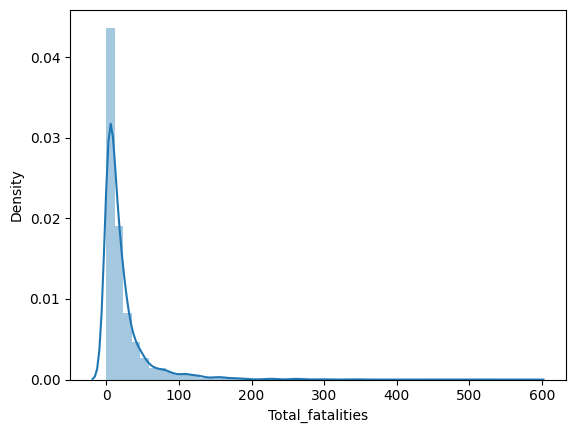

In [82]:
sns.distplot(df["Total_fatalities"], hist=True) #Density es la proporsion de vuelos que tenian esa cantidad de personas abordo.
df["Total_fatalities"].describe()

In [83]:
df.head()

,Date,Time,Accident_Place,Operator,Flight_no,Fly_Route,Type,Registration,Cn/In,Total_aboard,Passanger_aboard,Crew_aboard,Total_fatalities,Passenger_fatalities,Crew_fatalities,Ground,Summary,Year
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,no_flight_no,Demonstration,Wright Flyer III,no_registration,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1909-09-07,00:00,"Juvisy-sur-Orge, France",no_operator,no_flight_no,Air show,Wright Byplane,SC1,no_cn/in,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909
2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,no_flight_no,Test flight,Dirigible,no_registration,no_cn/in,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
3,1913-08-06,00:00,"Victoria, British Columbia, Canada",Private,no_flight_no,no_fly_route,Curtiss seaplane,no_registration,no_cn/in,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
4,1913-09-09,1830,Over the North Sea,Military - German Navy,no_flight_no,no_fly_route,Zeppelin L-1 (airship),no_registration,no_cn/in,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,1913


In [84]:
df[["Total_aboard", "Passanger_aboard", "Crew_aboard", "Total_fatalities", "Passenger_fatalities", "Crew_fatalities", "Ground"]].corr()

,Total_aboard,Passanger_aboard,Crew_aboard,Total_fatalities,Passenger_fatalities,Crew_fatalities,Ground
Total_aboard,1.000000,0.997487,0.568893,0.739646,0.746712,0.320119,0.020327
Passanger_aboard,0.997487,1.000000,0.510741,0.738965,0.747417,0.274408,0.018833
Crew_aboard,0.568893,0.510741,1.000000,0.441561,0.395682,0.720937,0.032121
Total_fatalities,0.739646,0.738965,0.441561,1.000000,0.992972,0.572386,0.032410
Passenger_fatalities,0.746712,0.747417,0.395682,0.992972,1.000000,0.507185,0.030132
Crew_fatalities,0.320119,0.274408,0.720937,0.572386,0.507185,1.000000,0.043905
Ground,0.020327,0.018833,0.032121,0.032410,0.030132,0.043905,1.000000


In [85]:
total_accidentes = len(df)
print("Numero total de accidentes: ", total_accidentes)

Numero total de accidentes:  4991


In [86]:
accidentes_por_year = df["Year"].value_counts().sort_index()
print("Accidentes por año: ")
print(accidentes_por_year)

Accidentes por año: 
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2017    15
2018    19
2019    13
2020     8
2021     7
Name: Year, Length: 111, dtype: int64


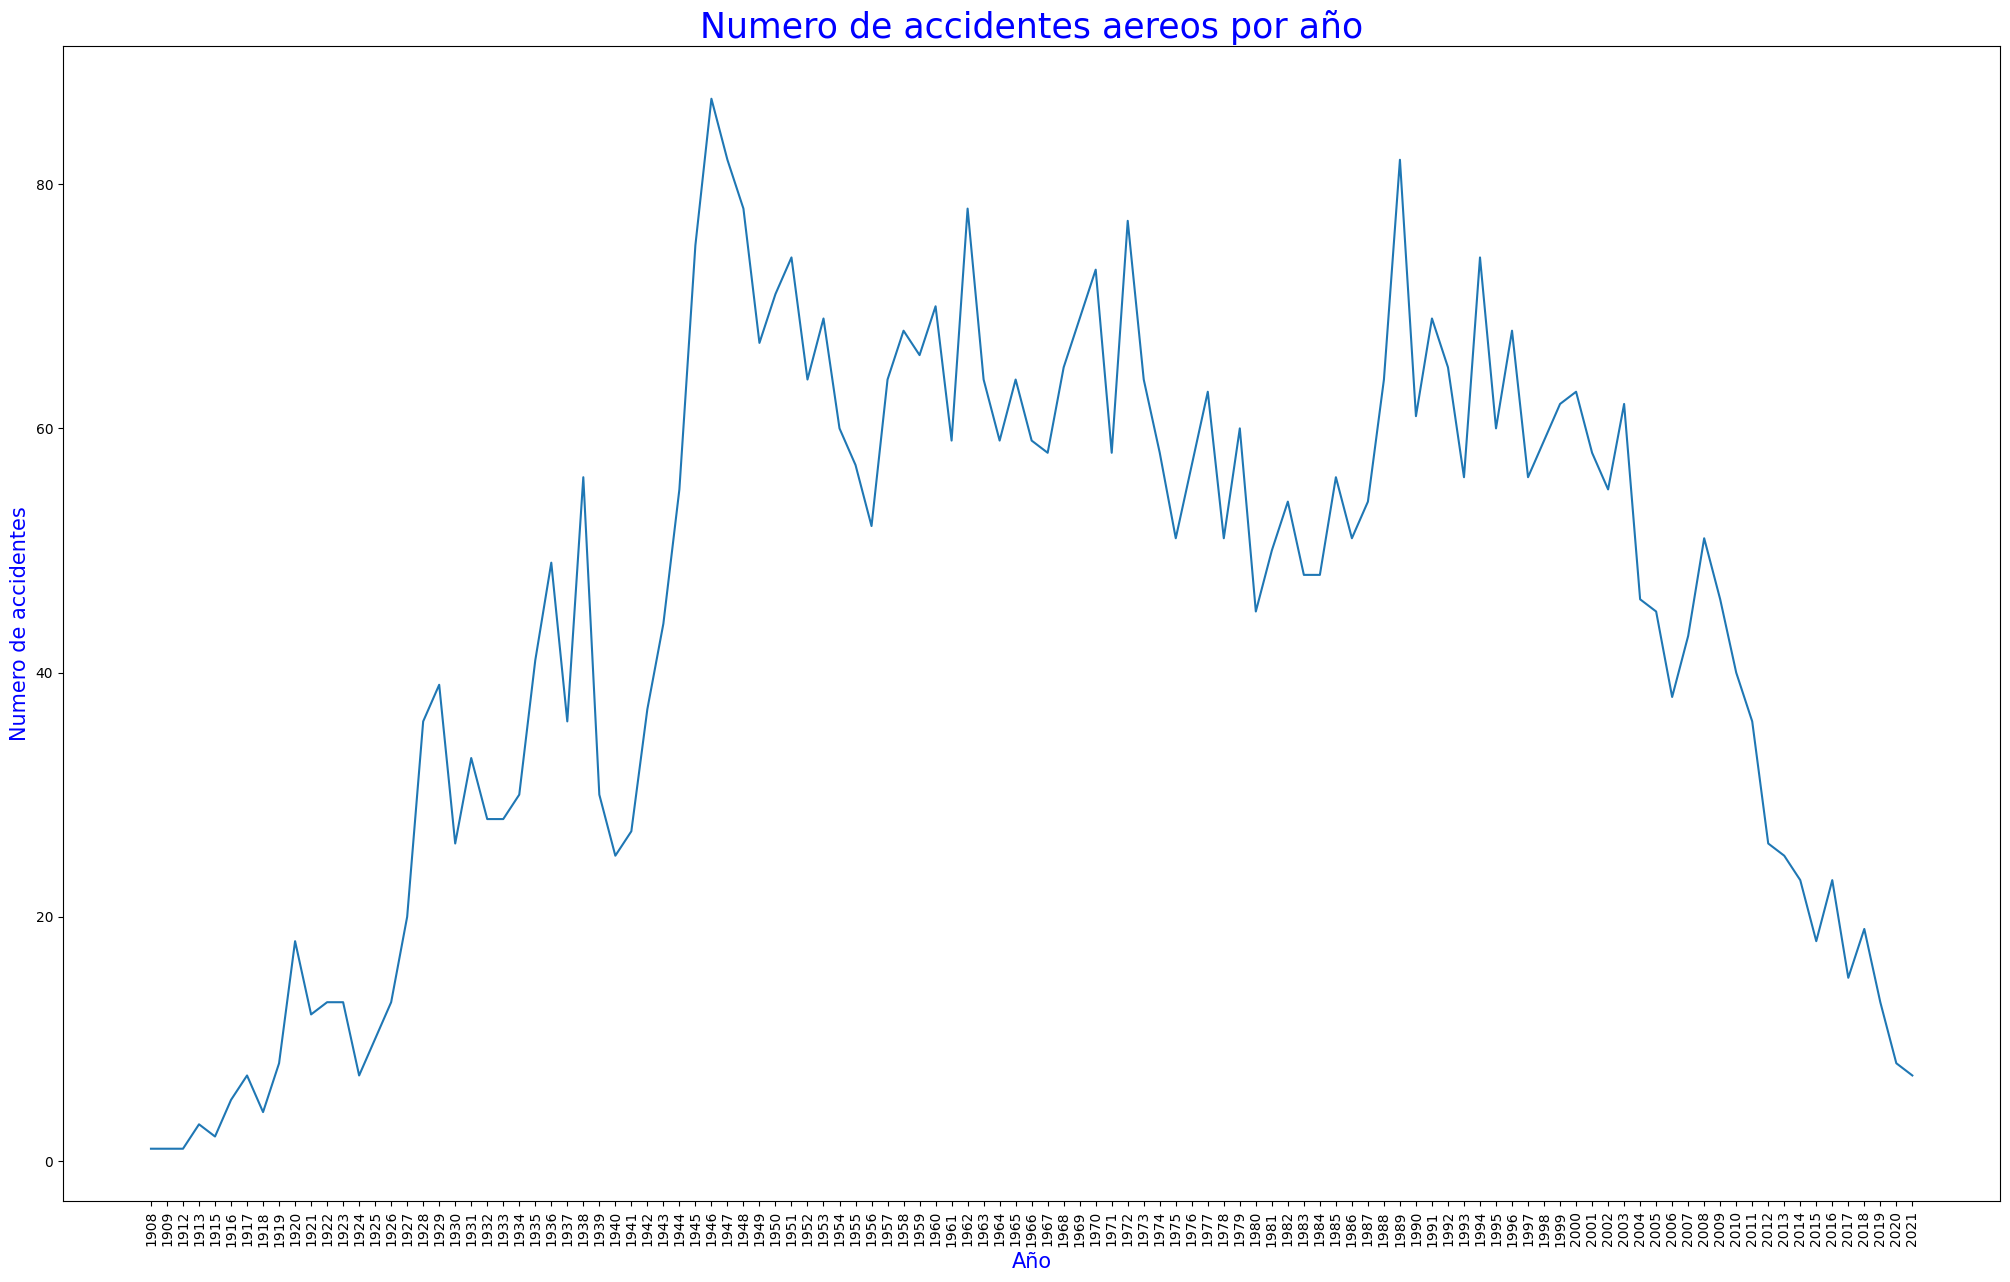

In [87]:
plt.figure(figsize=(25,15))
sns.lineplot(accidentes_por_year)
plt.xticks(rotation ="vertical")
plt.xlabel("Año", fontsize = 15, color = "blue")
plt.ylabel("Numero de accidentes", fontsize = 15, color = "blue")
plt.title("Numero de accidentes aereos por año", fontsize = 25, color = "blue")
plt.show()

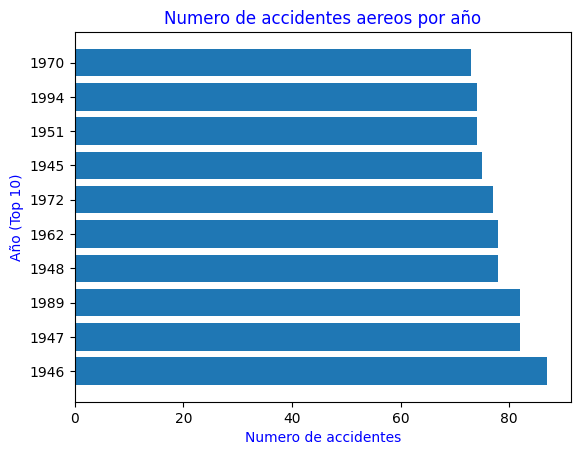

In [88]:
top_10_categorias = accidentes_por_year.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de accidentes", color = "blue")
plt.ylabel("Año (Top 10)", color = "blue")
plt.title("Numero de accidentes aereos por año", color = "blue")
plt.show()

In [89]:
accidentes_por_type = df["Type"].value_counts().sort_values(ascending=False).head(10)
print("Accidentes por tipo de aeronave: ")
print(accidentes_por_type)

Accidentes por tipo de aeronave: 
Douglas DC-3                                330
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 63
Douglas DC-4                                 41
Antonov AN-26                                35
Yakovlev YAK-40                              35
Junkers JU-52/3m                             30
Douglas DC-6B                                27
De Havilland DH-4                            27
Name: Type, dtype: int64


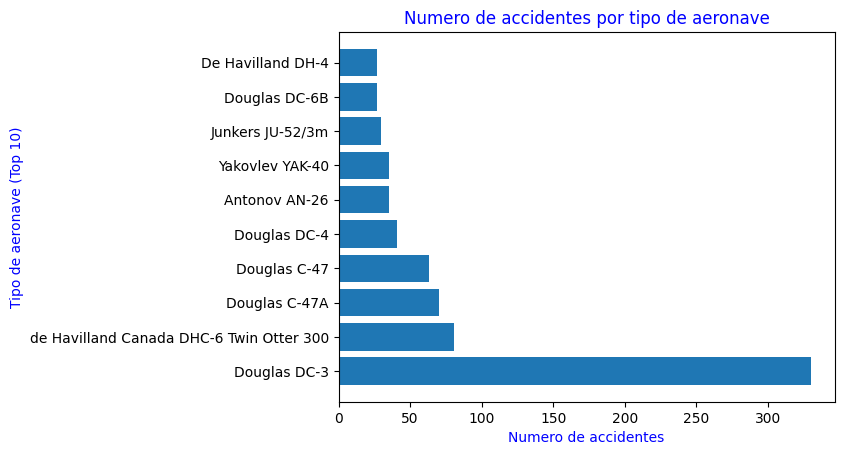

In [90]:
top_10_categorias = accidentes_por_type.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de accidentes", color = "blue")
plt.ylabel("Tipo de aeronave (Top 10)", color = "blue")
plt.title("Numero de accidentes por tipo de aeronave", color = "blue")
plt.show()

In [91]:
accidentes_por_operator = df["Operator"].value_counts().sort_values(ascending=False).head(10)
print("Accidentes por tipo de operador: ")
print(accidentes_por_operator)

Accidentes por tipo de operador: 
Aeroflot                               253
Military - U.S. Air Force              141
Air France                              73
Deutsche Lufthansa                      63
United Air Lines                        44
Military - U.S. Army Air Forces         43
Pan American World Airways              41
China National Aviation Corporation     38
American Airlines                       37
US Aerial Mail Service                  35
Name: Operator, dtype: int64


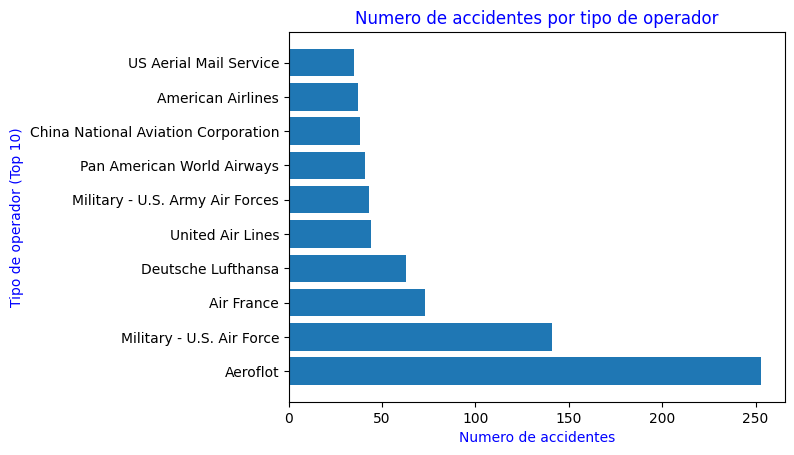

In [92]:
top_10_categorias = accidentes_por_operator.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de accidentes", color = "blue")
plt.ylabel("Tipo de operador (Top 10)", color = "blue")
plt.title("Numero de accidentes por tipo de operador", color = "blue")
plt.show()

In [93]:
accidentes_por_route = df["Fly_Route"].value_counts().sort_values(ascending=False).head(10)
print("Accidentes por tipo de ruta: ")
print(accidentes_por_route)

Accidentes por tipo de ruta: 
no_fly_route                  748
Training                       96
Sightseeing                    31
Test flight                    23
Sao Paulo - Rio de Janeiro      7
Test                            6
Rio de Janeiro - Sao Paulo      5
Croydon - Paris                 4
Bogota - Barranquilla           4
Tallinn - Helsinki              4
Name: Fly_Route, dtype: int64


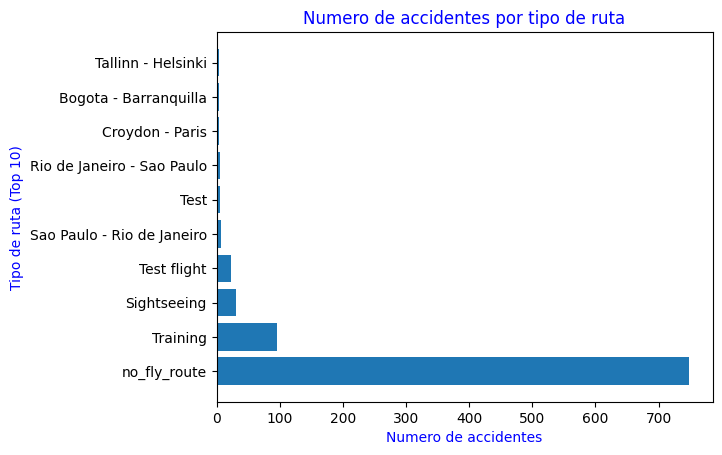

In [94]:
top_10_categorias = accidentes_por_route.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de accidentes", color = "blue")
plt.ylabel("Tipo de ruta (Top 10)", color = "blue")
plt.title("Numero de accidentes por tipo de ruta", color = "blue")
plt.show()

In [95]:
df.head(3)

,Date,Time,Accident_Place,Operator,Flight_no,Fly_Route,Type,Registration,Cn/In,Total_aboard,Passanger_aboard,Crew_aboard,Total_fatalities,Passenger_fatalities,Crew_fatalities,Ground,Summary,Year
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,no_flight_no,Demonstration,Wright Flyer III,no_registration,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1909-09-07,00:00,"Juvisy-sur-Orge, France",no_operator,no_flight_no,Air show,Wright Byplane,SC1,no_cn/in,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909
2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,no_flight_no,Test flight,Dirigible,no_registration,no_cn/in,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912


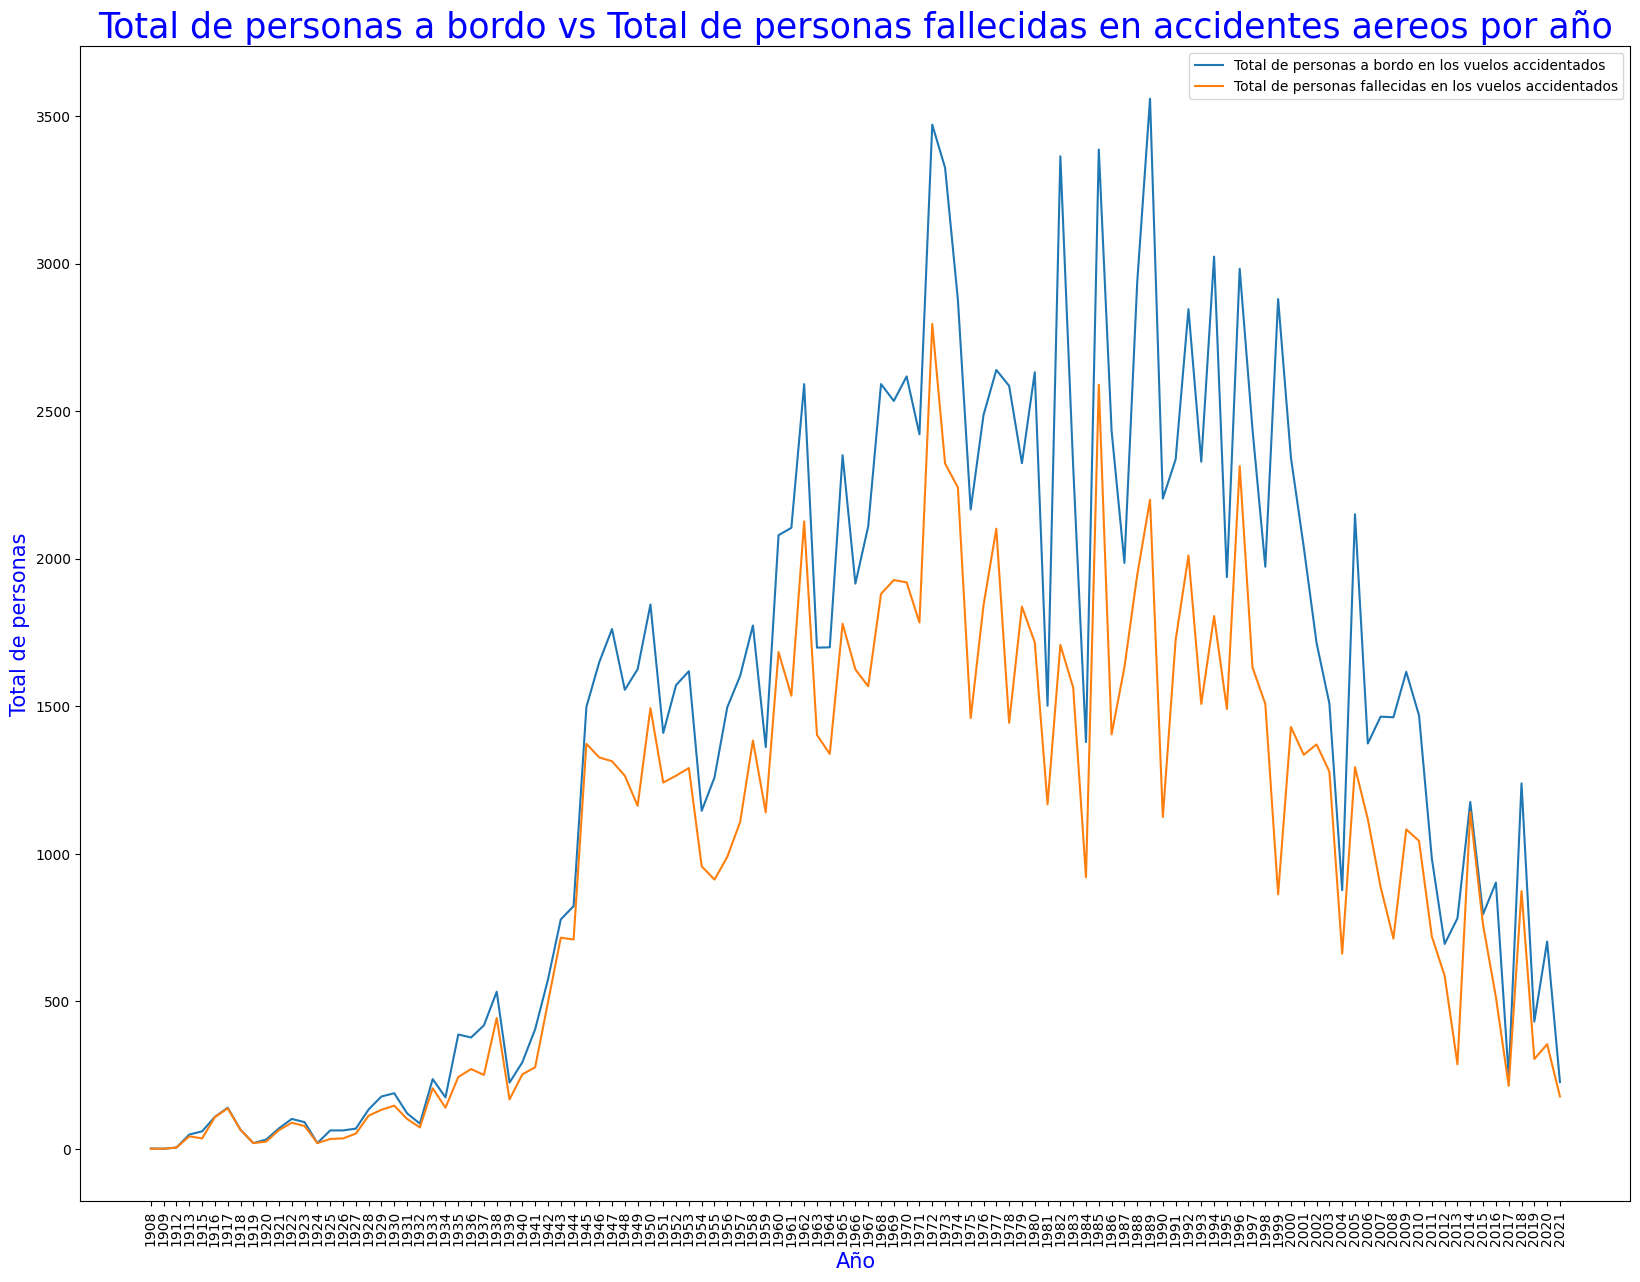

In [96]:
plt.figure(figsize=(20,15))
total_all_aboard_por_year = df.groupby("Year")["Total_aboard"].sum() #Calcula el total de personas a bordo por año
total_fatalities_por_year = df.groupby("Year")["Total_fatalities"].sum() #Calcula el total de personas fallecidas por año
plt.plot(total_all_aboard_por_year.index, total_all_aboard_por_year.values, label = "Total de personas a bordo en los vuelos accidentados")
plt.plot(total_fatalities_por_year.index, total_fatalities_por_year.values, label = "Total de personas fallecidas en los vuelos accidentados")
plt.xticks(rotation ="vertical")
plt.xlabel("Año", fontsize = 15, color = "blue")
plt.ylabel("Total de personas", fontsize = 15, color = "blue")
plt.title("Total de personas a bordo vs Total de personas fallecidas en accidentes aereos por año", fontsize = 25, color = "blue")
plt.legend(fontsize = 10)
plt.show()

In [97]:
tasa_de_mortalidad = (total_fatalities_por_year / total_all_aboard_por_year)*100
tasa_de_mortalidad

Year
1908     50.000000
1909    100.000000
1912    100.000000
1913     87.755102
1915     60.000000
           ...    
2017     87.346939
2018     70.540759
2019     70.601852
2020     50.497866
2021     78.414097
Length: 111, dtype: float64

In [98]:
indice_de_supervivencia = ((total_all_aboard_por_year - total_fatalities_por_year) / total_all_aboard_por_year) * 100
indice_de_supervivencia

Year
1908    50.000000
1909     0.000000
1912     0.000000
1913    12.244898
1915    40.000000
          ...    
2017    12.653061
2018    29.459241
2019    29.398148
2020    49.502134
2021    21.585903
Length: 111, dtype: float64

In [99]:
# Agrupa los datos por año y operador, y cuenta la cantidad de accidentes en cada combinación
accidentes_por_operador = df.groupby(['Year', 'Operator']).size().reset_index(name='Accidentes')
# Agrupa nuevamente los datos solo por año y calcula la suma total de accidentes por año
total_accidentes_por_año = accidentes_por_operador.groupby('Year')['Accidentes'].sum().reset_index(name='Total Accidentes')
# Fusiona los DataFrames accidentes_por_operador y total_accidentes_por_año utilizando la columna "Año" como clave de unión
accidentalidad_operador_df = pd.merge(accidentes_por_operador, total_accidentes_por_año, on='Year')
# Calcula la tasa de accidentalidad dividiendo el número de accidentes por operador en cada año por el total de accidentes en ese año
accidentalidad_operador_df['Tasa de accidentalidad del operador'] = (accidentalidad_operador_df['Accidentes'] / accidentalidad_operador_df['Total Accidentes'])*100

accidentalidad_operador_df

,Year,Operator,Accidentes,Total Accidentes,Tasa de accidentalidad del operador
0,1908,Military - U.S. Army,1,1,100.000000
1,1909,no_operator,1,1,100.000000
2,1912,Military - U.S. Navy,1,1,100.000000
3,1913,Military - German Navy,2,3,66.666667
4,1913,Private,1,3,33.333333
...,...,...,...,...,...
4101,2021,Military - Nigerian Air Force,1,7,14.285714
4102,2021,Military - Philippine Air Force,1,7,14.285714
4103,2021,Soloy Helicopters,1,7,14.285714
4104,2021,South Sudan Supreme Airlines,1,7,14.285714


In [100]:
# Agrupa los datos por año y tipo de aeronave, y cuenta la cantidad de accidentes en cada combinación
accidentes_por_tipo_aeronave = df.groupby(['Year', 'Type']).size().reset_index(name='Accidentes')
# Agrupa nuevamente los datos solo por año y calcula la suma total de accidentes por año
total_accidentes_por_año = accidentes_por_tipo_aeronave.groupby('Year')['Accidentes'].sum().reset_index(name='Total Accidentes')
# Fusiona los DataFrames accidentes_por_tipo_aeronave y total_accidentes_por_año utilizando la columna "Año" como clave de unión
accidentalidad_tipo_aeronave_df = pd.merge(accidentes_por_tipo_aeronave, total_accidentes_por_año, on='Year')
# Calcula la tasa de accidentalidad dividiendo el número de accidentes por tipo de aeronave en cada año por el total de accidentes en ese año
accidentalidad_tipo_aeronave_df['Tasa de accidentalidad del tipo de aeronave'] = (accidentalidad_tipo_aeronave_df['Accidentes'] / accidentalidad_tipo_aeronave_df['Total Accidentes'])*100
accidentalidad_tipo_aeronave_df

,Year,Type,Accidentes,Total Accidentes,Tasa de accidentalidad del tipo de aeronave
0,1908,Wright Flyer III,1,1,100.000000
1,1909,Wright Byplane,1,1,100.000000
2,1912,Dirigible,1,1,100.000000
3,1913,Curtiss seaplane,1,3,33.333333
4,1913,Zeppelin L-1 (airship),1,3,33.333333
...,...,...,...,...,...
4169,2021,Beechcraft B300 King Air 350i,1,7,14.285714
4170,2021,Boeing 737-524,1,7,14.285714
4171,2021,Eurocopter AS350B3 Ecureuil,1,7,14.285714
4172,2021,Let L-410UVP-E,1,7,14.285714


In [101]:
# Agrupa los datos por año y ruta, y cuenta la cantidad de accidentes en cada combinación
accidentes_por_ruta = df.groupby(['Year', 'Fly_Route']).size().reset_index(name='Accidentes')
# Agrupa nuevamente los datos solo por año y calcula la suma total de accidentes por año
total_accidentes_por_año = accidentes_por_ruta.groupby('Year')['Accidentes'].sum().reset_index(name='Total Accidentes')
# Fusiona los DataFrames accidentes_por_ruta y total_accidentes_por_año utilizando la columna "Año" como clave de unión
accidentalidad_ruta_df = pd.merge(accidentes_por_ruta, total_accidentes_por_año, on='Year')
# Calcula la tasa de accidentalidad dividiendo el número de accidentes por ruta en cada año por el total de accidentes en ese año
accidentalidad_ruta_df['Tasa de accidentalidad de la ruta'] = (accidentalidad_ruta_df['Accidentes'] / accidentalidad_ruta_df['Total Accidentes'])*100
accidentalidad_ruta_df

,Year,Fly_Route,Accidentes,Total Accidentes,Tasa de accidentalidad de la ruta
0,1908,Demonstration,1,1,100.000000
1,1909,Air show,1,1,100.000000
2,1912,Test flight,1,1,100.000000
3,1913,no_fly_route,3,3,100.000000
4,1915,no_fly_route,2,2,100.000000
...,...,...,...,...,...
4259,2021,Naypyidaw - Anisakan,1,7,14.285714
4260,2021,Petropavlovsk - Palana,1,7,14.285714
4261,2021,Pieri - Yuai,1,7,14.285714
4262,2021,Sightseeing Charter,1,7,14.285714


In [102]:
df.to_csv("Acc_Aviones_Limpio.csv", index=False)